(supply_demand_multiple_goods)=
# 多种商品的供需关系

## 概览

在{doc}`之前的讲座 <intro_supply_demand>`中我们研究了一个只有单一消费商品市场的供给、需求和福利。

在这个讲座中，我们将研究有$n$种商品和$n$对应价格的情景。

我们将在这次讲座中遇到的关键基础概念包括：

* 反向需求曲线
* 财富的边际效用
* 反向供给曲线
* 消费者剩余
* 生产者剩余
* 社会福利作为消费者剩余和生产者剩余之和
* 竞争均衡

我们将提供[第一福利基本定理](https://en.wikipedia.org/wiki/Fundamental_theorems_of_welfare_economics)的一个版本，这个定理是由下列经济学家提出的：

* [莱昂·瓦尔拉斯](https://en.wikipedia.org/wiki/L%C3%A9on_Walras)
* [弗朗西斯·伊西德罗·埃奇沃思](https://en.wikipedia.org/wiki/Francis_Ysidro_Edgeworth)
* [维尔弗雷多·帕累托](https://en.wikipedia.org/wiki/Vilfredo_Pareto)

对这些关键想法的重要扩展是由以下学者获得的：

* [阿巴·勒纳](https://en.wikipedia.org/wiki/Abba_P._Lerner)
* [哈罗德·霍特林](https://en.wikipedia.org/wiki/Harold_Hotelling)
* [保罗·萨缪尔森](https://en.wikipedia.org/wiki/Paul_Samuelson)
* [肯尼斯·阿罗](https://en.wikipedia.org/wiki/Kenneth_Arrow) 
* [热拉尔·德布鲁](https://en.wikipedia.org/wiki/G%C3%A9rard_Debreu)

我们将描述两个经典的福利定理：

* **第一福利定理：** 对于消费者之间给定的财富分配，竞争均衡下的商品分配方案解决了一个社会规划问题。
* **第二福利定理：** 解决社会规划问题的商品分配可以通过适当初始财富分配的竞争均衡来支持。

如往常一样，我们首先导入一些Python模块。

In [1]:
# 导入一些包
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.linalg import inv

FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

## 来自线性代数的公式

我们将应用线性代数中的公式，这些公式：

* 将内积关于每个向量进行区分
* 将矩阵与向量的乘积关于向量进行区分
* 将向量的二次型关于向量进行区分

这里 $a$ 为一个 $n \times 1$ 向量，$A$ 为一个 $n \times n$ 矩阵, 且 $x$ 为一个 $n \times 1$ 向量:

$$
\frac{\partial a^\top x }{\partial x} = \frac{\partial x^\top a }{\partial x} = a
$$

$$
\frac{\partial A x} {\partial x} = A
$$

$$
\frac{\partial x^\top A x}{\partial x} = (A + A^\top)x
$$

## 从效用函数到需求曲线

我们对消费者的研究将使用以下基本元素：

* $\Pi$ 是一个 $m \times n$ 矩阵，
* $b$ 是一个 $m \times 1$ 的幸福点向量，
* $e$ 是一个 $n \times 1$ 的禀赋向量，

我们将分析内生对象 $c$ 和 $p$，其中：

* $c$ 是一个 $n \times 1$ 各种商品的消费向量，
* $p$ 是一个 $n \times 1$ 价格向量

矩阵 $\Pi$ 描述了消费者愿意如何替换一个商品以换取其他每一个商品。

我们假设 $\Pi$ 的列线性独立，这意味着 $\Pi^\top \Pi$ 是一个正定矩阵。

* 这意味着 $\Pi^\top \Pi$ 有一个逆矩阵。

我们将在下面看到，$(\Pi^\top \Pi)^{-1}$ 是一个对价格向量来说的 $c$ 的（补偿的）需求曲线斜率矩阵：

$$
    \frac{\partial c } {\partial p} = (\Pi^\top \Pi)^{-1}
$$

消费者面对价格 $p$ 作为价格接受者，并选择 $c$ 来最大化效用函数

$$
    -\frac{1}{2} (\Pi c -b)^\top (\Pi c -b)
$$ (eq:old0)

受到预算约束的限制

$$
    p^\top (c -e) = 0
$$ (eq:old2)

我们将指定一些例子，其中 $\Pi$ 和 $b$ 是这样的，通常会发生

$$
    \Pi c \ll b
$$ (eq:bversusc)

这意味着消费者得到的每种商品都远少于他希望的数量。

在 {eq}`eq:bversusc` 中的偏差最终将保证我们竞争性均衡价格是正的。

### 被约束的效用最大化所暗示的需求曲线

目前，我们假设预算约束是 {eq}`eq:old2`。

因此，我们将导出所谓的**马歇尔**需求曲线。

我们的目标是在约束 [](eq:old2) 下最大化 [](eq:old0)。

构建一个拉格朗日方法

$$ L = - \frac{1}{2} (\Pi c -b)^T (\Pi c -b ) + \mu [p^T (e-c)] $$

其中 $\mu$ 是一个拉格朗日乘数，通常称为**财富的边际效用**。

消费者选择 $c$ 来最大化 $L$，选 $\mu$ 来最小化它。

$c$ 的一阶条件是

$$
    \frac{\partial L} {\partial c}
    = - \Pi^T \Pi c + \Pi^T b - \mu p = 0
$$

因此，给定 $\mu$，消费者选择

$$
    c = (\Pi^T \Pi )^{-1}(\Pi^T b -  \mu p )
$$ (eq:old3)

将 {eq}`eq:old3` 代入预算约束 {eq}`eq:old2` 并解出 $\mu$ 得

$$
    \mu(p,e) = \frac{p^T ( \Pi^T \Pi )^{-1} \Pi^T b - p^T e}{p^T (\Pi^T \Pi )^{-1} p}.
$$ (eq:old4)

方程 {eq}`eq:old4` 描述了财富的边际效用如何依赖于禀赋向量 $e$ 和价格向量 $p$。

```{note}
方程 {eq}`eq:old4` 是基于约束 $p^T (c - e) = 0$ 得到的结果。

我们也可以将 $\mu$ 视为一个参数，并使用 {eq}`eq:old3` 和预算约束 {eq}`eq:old2p` 来解算财富。

我们如何进行取决于我们是构建**马歇尔**需求曲线还是**希克斯**需求曲线。
```

## 禀赋经济

我们现在研究一个纯交换经济，或者有时被称为禀赋经济。

考虑一个单一消费者，多种商品的经济体，没有生产。

商品的唯一来源是单一消费者的禀赋向量 $e$。

一个竞争性均衡价格向量促使消费者选择 $c=e$。

这意味着均衡价格向量满足

$$
p = \mu^{-1} (\Pi^	T b - \Pi^	T \Pi e)
$$

在我们施加了形式为 {eq}`eq:old2` 的预算约束的当前情况下，我们可以通过设置财富边际效用 $\mu =1$（或其他任何值）来规范化价格向量。

这相当于选择一个通用单位（或计价单位），在该单位中表达所有货物的价格。

（价格翻倍既不会影响数量也不会影响相对价格。）

我们将设置 $\mu=1$。

```{exercise}
:label: sdm_ex1

验证在 {eq}`eq:old3` 中设置 $\mu=1$ 意味着满足公式 {eq}`eq:old4`。

```

```{exercise}
:label: sdm_ex2

验证在 {eq}`eq:old3` 中设置 $\mu=2` 也意味着满足公式 {eq}`eq:old4`。

```

以下是一个计算我们经济体竞争性均衡的类。

In [2]:
class ExchangeEconomy:
    
    def __init__(self,
                 Π,
                 b, 
                 e,
                 thres=1.5):
        """
        设置交换经济的环境

        参数:
            Π (np.array): 替代共享矩阵
            b (list): 消费者的极乐点
            e (list): 消费者的禀赋
            thres (float): 检查 p >> Π e 条件的阈值
        """

        # 检查非饱和性
        if np.min(b / np.max(Π @ e)) <= thres:
            raise Exception('将极乐点设置得更远一些')


        self.Π, self.b, self.e = Π, b, e

    
    def competitive_equilibrium(self):
        """
        计算竞争性均衡价格和配置
        """
        Π, b, e = self.Π, self.b, self.e

        # 计算价格向量，μ=1
        p = Π.T @ b - Π.T @ Π @ e
        
        # 计算消费向量
        slope_dc = inv(Π.T @ Π)
        Π_inv = inv(Π)
        c = Π_inv @ b - slope_dc @ p

        if any(c < 0):
            print('allocation: ', c)
            raise Exception('负配给：均衡不存在')

        return p, c

## 题外话：马歇尔需求曲线与希克斯需求曲线

有时我们会在消费者的禀赋向量 $e$ 是其**唯一**收入来源的情况下使用预算限制 {eq}`eq:old2`。

其他时候，我们假设消费者有另一来源的收入（正或负），并把他的预算限制写作

$$
p ^\top (c -e) = w
$$ (eq:old2p)

其中 $w$ 以“美元”（或其他**计价单位**）计量，价格向量的组成 $p_i$ 则以每单位商品 $i$ 的美元计量。

无论消费者的预算限制是 {eq}`eq:old2` 还是 {eq}`eq:old2p`，以及我们将 $w$ 视为一个自由参数还是一个内生变量，都会影响消费者的财富边际效用。

因此，我们如何设置 $\mu$ 决定我们是在构建

* **马歇尔** 需求曲线，如当我们使用 {eq}`eq:old2` 并使用上述方程 {eq}`eq:old4` 解 $\mu$ 时，或
* **希克斯** 需求曲线，如当我们将 $\mu$ 视为一个固定参数并从 {eq}`eq:old2p` 解 $w$ 时。

马歇尔和希克斯需求曲线考虑的是不同的心理实验：

对于马歇尔需求曲线，假设的价格向量变化有**替代**效应和**收入**效应

* 收入效应是价格向量变化所引起的 $p^\top e$ 变动的后果

对于希克斯需求曲线，假设的价格向量变化只有**替代**效应

* 价格向量的变化不会改变 $p^\top e + w$，因为我们固定 $\mu$ 并解出 $w$

有时希克斯需求曲线被称为**补偿**需求曲线，以强调为了消除与价格变化相关的收入（或财富）效应，消费者的财富 $w$ 被调整。

接下来我们将更多地讨论这些不同的需求曲线。

## 动态与风险作为特殊情况

通过在不同商品上标注不同日期，或者将商品的交付解释为取决于状态的世界（这些状态的实现由*已知概率分布*描述），我们可以创建$n$物品纯交换模型的特殊案例来代表：

* **动态** —— 通过将不同的商品放在不同的日期
* **风险** —— 通过解释商品的交付依赖于世界的状态，这些状态的实现由一个已知的概率分布描述

让我们来说明一下。

### 动态

假设我们想要表示一个效用函数

$$
  - \frac{1}{2} [(c_1 - b_1)^2 + \beta (c_2 - b_2)^2]
$$

这里 $\beta \in (0,1)$ 是一个贴现因子，$c_1$ 是时间1的消费，$c_2$ 是时间2的消费。

要用我们的二次效用函数{eq}`eq:old0`来表示这一点，设置

$$
\Pi = \begin{bmatrix} 1 & 0 \cr
         0 & \sqrt{\beta} \end{bmatrix}
$$

$$
e = \begin{bmatrix} e_1 \cr e_2 \end{bmatrix}
$$

以及

$$
b = \begin{bmatrix} b_1 \cr \sqrt{\beta} b_2 \end{bmatrix}
$$

预算约束{eq}`eq:old2`变为

$$
p_1 c_1 + p_2 c_2 = p_1 e_1 + p_2 e_2
$$

左侧是消费的**贴现现值**。

右侧是消费者禀赋的**贴现现值**。

相对价格 $\frac{p_1}{p_2}$ 的单位是时间2商品每时间1商品单位。

因此，

$$
    (1+r) := R := \frac{p_1}{p_2}
$$ 

是**毛利率**，$r$ 是**净利率**。

这里是一个例子。

In [3]:
beta = 0.95

Π = np.array([[1, 0],
              [0, np.sqrt(beta)]])

b = np.array([5, np.sqrt(beta) * 5])

e = np.array([1, 1])

dynamics = ExchangeEconomy(Π, b, e)
p, c = dynamics.competitive_equilibrium()

print('Competitive equilibrium price vector:', p)
print('Competitive equilibrium allocation:', c)

Competitive equilibrium price vector: [4.  3.8]
Competitive equilibrium allocation: [1. 1.]


### 风险与状态相关权益

我们在**静态**环境中研究风险，这意味着只有一个时期。

所谓**风险**，是指结果事先未知，但受已知概率分布的制约。

例如，我们的消费者面对的**风险**特别体现在：

  * 有两种自然状态，$1$ 和 $2$。

  * 消费者知道状态 $1$ 发生的概率是 $\lambda$。

  * 消费者知道状态 $2$ 发生的概率是 $(1-\lambda)$。

在结果实现之前，消费者的**预期效用**是

$$
-\frac{1}{2} [\lambda (c_1 - b_1)^2 + (1-\lambda)(c_2 - b_2)^2]
$$

其中：

* $c_1$ 是状态 $1$ 中的消费
* $c_2$ 是状态 $2$ 中的消费

为了描述这些偏好，我们设置

$$
\Pi = \begin{bmatrix} \sqrt{\lambda} & 0 \cr
                     0  & \sqrt{1-\lambda} \end{bmatrix}
$$

$$
e = \begin{bmatrix} e_1 \cr e_2 \end{bmatrix}
$$

$$
b = \begin{bmatrix} \sqrt{\lambda}b_1 \cr \sqrt{1-\lambda}b_2 \end{bmatrix}
$$

消费者的禀赋向量是

$$
c = \begin{bmatrix} c_1 \cr c_2 \end{bmatrix}
$$

一个价格向量是

$$
p = \begin{bmatrix} p_1 \cr p_2 \end{bmatrix}
$$

其中 $p_i$ 是状态 $i \in \{1, 2\}$ 下的一单位消费的价格。

交易中的状态相关商品常被称为**箭头证券**。

在世界的随机状态 $i$ 实现之前，消费者卖掉他/她的状态相关的禀赋组合，并购买一个状态相关的消费组合。

交易此类状态相关商品是经济学家常用来模拟**保险**的方式之一。

我们使用上述技巧来解释 $c_1, c_2$ 作为“箭证券”，它们是对消费品的状态条件索赔。

这里是一个风险经济的实例：

In [4]:
prob = 0.2

Π = np.array([[np.sqrt(prob), 0],
              [0, np.sqrt(1 - prob)]])

b = np.array([np.sqrt(prob) * 5, np.sqrt(1 - prob) * 5])

e = np.array([1, 1])

risk = ExchangeEconomy(Π, b, e)
p, c = risk.competitive_equilibrium()

print('竞争均衡价格向量:', p)
print('竞争均衡分配:', c)

竞争均衡价格向量: [0.8 3.2]
竞争均衡分配: [1. 1.]


```{exercise}
:label: sdm_ex3

考虑上面的实例。

请数值研究以下每种情况如何影响均衡价格和分配：

* 消费者变得更穷，
* 他们更喜欢第一种商品，或者
* 状态 $1$ 发生的概率更高。

提示：对于每种情况，选择与实例不同的一些参数 $e, b, \text{或} \lambda$。

```

```{solution-start} sdm_ex3
:class: dropdown
```

首先考虑当消费者更穷时。

这里我们只是减少了禀赋。

In [5]:
risk.e = np.array([0.5, 0.5])

p, c = risk.competitive_equilibrium()

print('竞争均衡价格向量:', p)
print('竞争均衡分配:', c)

竞争均衡价格向量: [0.9 3.6]
竞争均衡分配: [0.5 0.5]


如果消费者更喜欢第一（或第二）种商品，那么我们可以为商品1设置更大的极乐值。

In [6]:
risk.b = np.array([np.sqrt(prob) * 6, np.sqrt(1 - prob) * 5])
p, c = risk.competitive_equilibrium()

print('竞争均衡价格向量:', p)
print('竞争均衡分配:', c)

竞争均衡价格向量: [1.1 3.6]
竞争均衡分配: [0.5 0.5]


增加状态 $1$ 发生的概率。

In [7]:
prob = 0.8

Π = np.array([[np.sqrt(prob), 0],
              [0, np.sqrt(1 - prob)]])

b = np.array([np.sqrt(prob) * 5, np.sqrt(1 - prob) * 5])

e = np.array([1, 1])

risk = ExchangeEconomy(Π, b, e)
p, c = risk.competitive_equilibrium()

print('竞争均衡价格向量:', p)
print('竞争均衡分配:', c)

竞争均衡价格向量: [3.2 0.8]
竞争均衡分配: [1. 1.]


```{solution-end}
```

## 具有内生供应的经济体

迄今为止，我们描述的是一个纯粹的交换经济，其中商品的禀赋是外生的，意味着它们是从模型外部给定的。

### 竞争性公司的供应曲线

能够生产商品的竞争公司将价格向量 $p$ 视为既定，并选择数量 $q$
以最大化总收入减去总成本。

公司的总收入等于 $p^T q$，其总成本等于 $C(q)$，其中 $C(q)$ 是总成本函数

$$
C(q) = h^T q + \frac{1}{2} q^T J q
$$

其中 $J$ 是一个正定矩阵。

因此公司的利润是

$$
p^T q - C(q)
$$ (eq:compprofits)

一个 $n \times 1$ 向量的**边际成本**是

$$
\frac{\partial C(q)}{\partial q} = h + H q
$$

其中

$$
H = \frac{1}{2} (J + J^T)
$$

公司通过将**边际收入等于边际成本**来最大化总利润。

对于收取定价的公司，一个 $n \times 1$ 向量的边际收入是 $\frac{\partial p^T q}
{\partial q} = p $。

因此对于我们这个收取定价的竞争公司 **价格等于边际收入**。

这导致以下竞争公司的**反向供应曲线**：

$$
p = h + H q
$$

### 竞争均衡

为了计算一个以需求曲线由财富边际效用 $\mu$ 确定的生产经济的竞争均衡，我们首先通过解决规划问题来计算分配。

然后，我们使用逆需求曲线或供应曲线计算均衡价格向量。

#### $\mu=1$ 的热身

作为一个特殊情况，通过设置财富的边际效用 $\mu =1$ 来确定一个需求曲线。

使供应价格等于需求价格并让 $q=c$，我们得到

$$
p = h + H c = \Pi^{\top} b - \Pi^{\top} \Pi c,
$$

这意味着均衡数量向量

$$
c = (\Pi^{\top} \Pi + H )^{-1} ( \Pi^{\top} b - h)
$$ (eq:old5)

这个方程是我们开始时的标量 $n=1$ 模型均衡数量 {eq}`eq:old1` 的对应物。

#### 通用 $\mu \neq 1$ 情况

现在让我们通过允许 $\mu \neq 1$ 来扩展之前的分析。

然后，逆需求曲线为

$$
p = \mu^{-1} [\Pi^{\top} b - \Pi^{\top} \Pi c]
$$ (eq:old5pa)

使这个等于逆供应曲线，让 $q=c$ 并解出 $c$ 得

$$
c = [\Pi^{\top} \Pi + \mu H]^{-1} [ \Pi^{\top} b - \mu h]
$$ (eq:old5p)

### 实现

生产型经济将包括：

* 一个我们将解释为代表性消费者的**个人**
* 一组**生产成本**
* 一个加权“消费者”与“生产者”在规划者福利函数中的乘数 $\mu$，如上文所述
* 一个 $n \times 1$ 向量 $p$，代表竞争均衡价格
* 一个 $n \times 1$ 向量 $c$，代表竞争均衡数量
* **消费者剩余**
* **生产者剩余**

这里我们定义一个类 `ProductionEconomy`。

In [8]:
class ProductionEconomy:
    
    def __init__(self, 
                 Π, 
                 b, 
                 h, 
                 J, 
                 μ):
        """
        设置生产型经济环境

        参数:
            Π (np.ndarray): 替代矩阵
            b (np.array): 极乐点
            h (np.array): 成本函数中的 h
            J (np.ndarray): 成本函数中的 J
            μ (float): 对应规划问题的福利权重
        """
        self.n = len(b)
        self.Π, self.b, self.h, self.J, self.μ = Π, b, h, J, μ
        
    def competitive_equilibrium(self):
        """
        计算生产型经济的竞争均衡
        """
        Π, b, h, μ, J = self.Π, self.b, self.h, self.μ, self.J
        H = .5 * (J + J.T)

        # 配置分配
        c = inv(Π.T @ Π + μ * H) @ (Π.T @ b - μ * h)

        # 计算价格
        p = 1 / μ * (Π.T @ b - Π.T @ Π @ c)

        # 检查非饱和
        if any(Π @ c - b >= 0):
            raise Exception('无效结果：将极乐点设置得更远一些')

        return c, p

    def compute_surplus(self):
        """
        计算单一商品情况下的消费者和生产者剩余
        """
        if self.n != 1:
            raise Exception('非单一商品')
        h, J, Π, b, μ = self.h.item(), self.J.item(), self.Π.item(), self.b.item(), self.μ
        H = J

        # 供需曲线系数
        s0, s1 = h, H
        d0, d1 = 1 / μ * Π * b, 1 / μ * Π**2

        # 竞争均衡
        c, p = self.competitive_equilibrium()

        # 计算剩余
        c_surplus = d0 * c - .5 * d1 * c**2 - p * c
        p_surplus = p * c - s0 * c - .5 * s1 * c**2

        return c_surplus, p_surplus

然后定义一个函数，用于绘制需求曲线和供给曲线，并标注剩余和均衡点。

In [9]:
def plot_competitive_equilibrium(PE):
    """
    绘制需求和供应曲线，生产者/消费者剩余以及均衡点
    单一商品生产型经济

    参数:
        PE (class): 初始化的生产经济类
    """
    # 获取单值
    J, h, Π, b, μ = PE.J.item(), PE.h.item(), PE.Π.item(), PE.b.item(), PE.μ
    H = J

    # 计算竞争均衡
    c, p = PE.competitive_equilibrium()
    c, p = c.item(), p.item()

    # 反转供需曲线
    supply_inv = lambda x: h + H * x
    demand_inv = lambda x: 1 / μ * (Π * b - Π * Π * x)

    xs = np.linspace(0, 2 * c, 100)
    ps = np.ones(100) * p
    supply_curve = supply_inv(xs)
    demand_curve = demand_inv(xs)

    # 绘图
    plt.figure()
    plt.plot(xs, supply_curve, label='供给曲线', color='#020060')
    plt.plot(xs, demand_curve, label='需求曲线', color='#600001')

    plt.fill_between(xs[xs <= c], demand_curve[xs <= c], ps[xs <= c], label='消费者剩余', color='#EED1CF')
    plt.fill_between(xs[xs <= c], supply_curve[xs <= c], ps[xs <= c], label='生产者剩余', color='#E6E6F5')

    plt.vlines(c, 0, p, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(p, 0, c, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(c, p, zorder=10, label='竞争均衡', color='#600001')

    plt.legend(loc='upper right')
    plt.margins(x=0, y=0)
    plt.ylim(0)
    plt.xlabel('数量')
    plt.ylabel('价格')
    plt.show()

#### 示例：单一经济体与单一商品和生产

现在我们来构建一个包含单一商品的生产经济示例。

为此我们需要：

  * 指定一个**个人**和一个**成本曲线**，以复现我们开始时用到的简单单商品供求示例

  * 计算均衡 $p$ 和 $c$，以及消费者和生产者剩余

  * 绘制这两种剩余的图表

  * 通过改变 $b$ 并观察 $p, c$ 的变化来进行实验

竞争均衡价格: 5.25
竞争均衡分配: 4.75


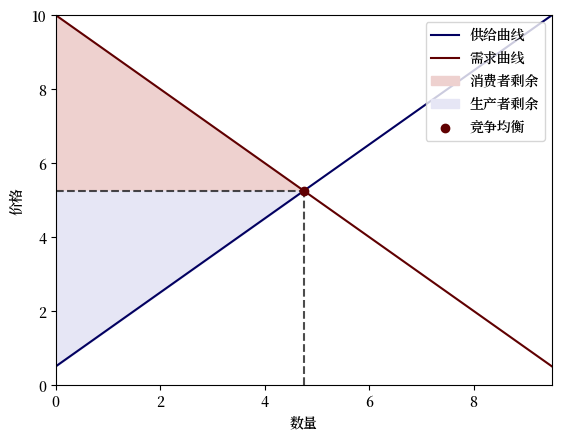

In [10]:
Π = np.array([[1]])  # 矩阵现在是一个单元素
b = np.array([10])
h = np.array([0.5])
J = np.array([[1]])
μ = 1

PE = ProductionEconomy(Π, b, h, J, μ)
c, p = PE.competitive_equilibrium()

print('竞争均衡价格:', p.item())
print('竞争均衡分配:', c.item())

plot_competitive_equilibrium(PE)

In [11]:
c_surplus, p_surplus = PE.compute_surplus()

print('消费者剩余:', c_surplus.item())
print('生产者剩余:', p_surplus.item())

消费者剩余: 11.28125
生产者剩余: 11.28125


通过提高 $\mu$ 降低消费者福利权重。

竞争均衡价格: 3.5
竞争均衡配置: 3.0


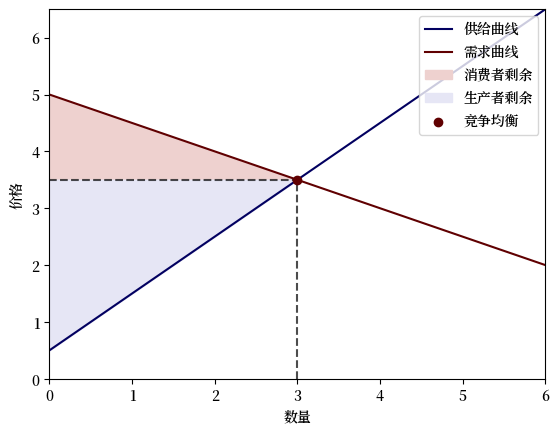

In [12]:
PE.μ = 2
c, p = PE.competitive_equilibrium()

print('竞争均衡价格:', p.item())
print('竞争均衡配置:', c.item())

plot_competitive_equilibrium(PE)

In [13]:
c_surplus, p_surplus = PE.compute_surplus()

print('消费者剩余:', c_surplus.item())
print('生产者剩余:', p_surplus.item())

消费者剩余: 2.25
生产者剩余: 4.5


现在我们改变极乐点，使消费者从消费中获得更多的效用。

竞争均衡价格: 7.75
竞争均衡配置: 7.25


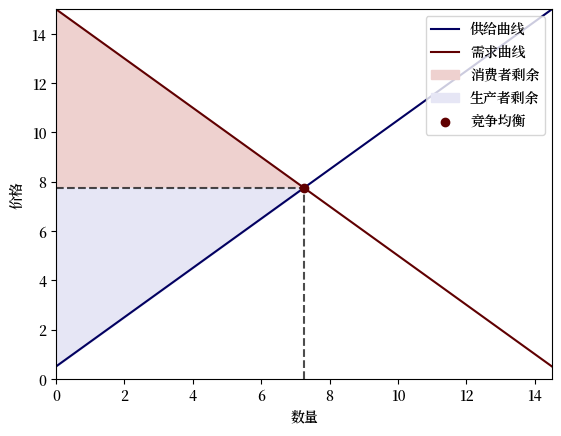

In [14]:
PE.μ = 1
PE.b = PE.b * 1.5
c, p = PE.competitive_equilibrium()

print('竞争均衡价格:', p.item())
print('竞争均衡配置:', c.item())

plot_competitive_equilibrium(PE)

这将提高均衡价格和数量。

#### 示例：单一代理双商品经济与生产

  * 我们将进行一些类似上面的实验

  * 我们可以使用**对角线** $\Pi$ 和**非对角线** $\Pi$ 矩阵来做实验，以研究交叉斜率如何影响 $p$ 和 $c$ 对 $b$ 的各种变化的反应（待办）

In [15]:
Π = np.array([[1, 0],
              [0, 1]])

b = np.array([10, 10])

h = np.array([0.5, 0.5])

J = np.array([[1, 0.5],
              [0.5, 1]])
μ = 1

PE = ProductionEconomy(Π, b, h, J, μ)
c, p = PE.competitive_equilibrium()

print('竞争性均衡价格:', p)
print('竞争性均衡配置:', c)

竞争性均衡价格: [6.2 6.2]
竞争性均衡配置: [3.8 3.8]


In [16]:
PE.b = np.array([12, 10])

c, p = PE.competitive_equilibrium()

print('竞争性均衡价格:', p)
print('竞争性均衡配置:', c)

竞争性均衡价格: [7.13333333 6.46666667]
竞争性均衡配置: [4.86666667 3.53333333]


In [17]:
PE.Π = np.array([[1, 0.5],
                 [0.5, 1]])

PE.b = np.array([10, 10])

c, p = PE.competitive_equilibrium()

print('竞争性均衡价格:', p)
print('竞争性均衡配置:', c)

竞争性均衡价格: [6.3 6.3]
竞争性均衡配置: [3.86666667 3.86666667]


In [18]:
PE.b = np.array([12, 10])
c, p = PE.competitive_equilibrium()

print('竞争性均衡价格:', p)
print('竞争性均衡配置:', c)

竞争性均衡价格: [7.23333333 6.56666667]
竞争性均衡配置: [4.93333333 3.6       ]


### 题外话：垄断的供应商

一个有竞争的公司是一个**价格接受者**，它认为价格因此其边际收益是无法由自己控制的。

垄断者知道他们没有竞争对手，可以通过设定产量来影响价格及其边际收益。

垄断者将**需求曲线**而不是**价格**视为无法控制的。

因此，垄断者不是价格接受者，而是设定价格以最大化利润，受逆需求曲线的约束
{eq}`eq:old5pa`。

所以垄断者的总利润作为其产量$q$的函数是

$$
[\mu^{-1} \Pi^{\text{top}} (b - \Pi q)]^{\text{top}} q - h^{\text{top}} q - \frac{1}{2} q^{\text{top}} J q
$$ (eq:monopprof)

在找到使垄断利润最大化关于$q$的
一阶必要条件并求解它们后，我们发现垄断者设置

$$
q = (H + 2 \mu^{-1} \Pi^{\text{top}} \Pi)^{-1} (\mu^{-1} \Pi^{\text{top}} b - h)
$$ (eq:qmonop)

我们很快会看到，一个垄断者设置的**产量**$q$比以下任何一个都要低：

 * 计划者选择$q$来最大化社会福利

 * 一个有竞争的均衡



```{exercise}
:label: sdm_ex4

请验证垄断者的供应曲线 {eq}`eq:qmonop`。

```

### 垄断者

让我们考虑一个垄断供应商。

我们在我们的 `ProductionEconomy` 类中加入了一个方法，以计算在供应商为垄断者时的均衡价格和配置。

由于供应商现在拥有设定价格的权力：

- 我们首先计算解决垄断者利润最大化问题的最佳产量。
- 然后我们从消费者的逆需求曲线中推导出一个均衡价格。

接下来，我们用图表来展示单一商品情况下，竞争性均衡和垄断供应商均衡之间的区别。

回忆一下，在竞争性均衡中，一个接受价格的供应商使得边际收入 $p$ 等于边际成本 $h + Hq$。

这给出了竞争生产者的逆供应曲线。

垄断者的边际收入不是常数，而是依赖于它设定的数量的一个非平凡函数。

垄断者的边际收入为

$$
MR(q) = -2\mu^{-1}\Pi^{\text{top}}\Pi q+\mu^{-1}\Pi^{\text{top}}b,
$$

垄断者将此等于其边际成本。

该图表显示，垄断者设定的产量比竞争均衡量更低。

在单一商品情况下，这种均衡与商品的更高价格相关。

In [19]:
class Monopoly(ProductionEconomy):
    
    def __init__(self, 
                 Π, 
                 b, 
                 h, 
                 J, 
                 μ):
        """
        继承ProductionEconomy类的所有属性和方法
        """
        super().__init__(Π, b, h, J, μ)
        

    def equilibrium_with_monopoly(self):
        """
        在有垄断供应商的情况下计算均衡价格和配置
        """
        Π, b, h, μ, J = self.Π, self.b, self.h, self.μ, self.J
        H = .5 * (J + J.T)

        # 配置
        q = inv(μ * H + 2 * Π.T @ Π) @ (Π.T @ b - μ * h)

        # 价格
        p = 1 / μ * (Π.T @ b - Π.T @ Π @ q)

        if any(Π @ q - b >= 0):
            raise Exception('无效结果：将幸福点设置得更远')

        return q, p

In [20]:
def plot_monopoly(M):
    """
    绘制需求曲线、边际生产成本和收益、剩余以及标记的均衡情况，在具有垄断供应商的单一商品经济情形下

    参数：
        M (class): 继承单一商品垄断经济类ProductionEconomy的类
    """
    # 获取单值
    J, h, Π, b, μ = M.J.item(), M.h.item(), M.Π.item(), M.b.item(), M.μ
    H = J

    # 计算竞争均衡
    c, p = M.competitive_equilibrium()
    q, pm = M.equilibrium_with_monopoly()
    c, p, q, pm = c.item(), p.item(), q.item(), pm.item()

    # 计算

    # 供需曲线反函数
    marg_cost = lambda x: h + H * x  # 边际成本
    marg_rev = lambda x: -2 * 1 / μ * Π * Π * x + 1 / μ * Π * b  # 边际收益
    demand_inv = lambda x: 1 / μ * (Π * b - Π * Π * x)  # 需求曲线

    xs = np.linspace(0, 2 * c, 100)
    pms = np.ones(100) * pm
    marg_cost_curve = marg_cost(xs)
    marg_rev_curve = marg_rev(xs)
    demand_curve = demand_inv(xs)

    # 绘图
    plt.figure()
    plt.plot(xs, marg_cost_curve, label='边际成本', color='#020060')
    plt.plot(xs, marg_rev_curve, label='边际收益', color='#E55B13')
    plt.plot(xs, demand_curve, label='需求', color='#600001')

    plt.fill_between(xs[xs <= q], demand_curve[xs <= q], pms[xs <= q], label='消费者剩余', color='#EED1CF')
    plt.fill_between(xs[xs <= q], marg_cost_curve[xs <= q], pms[xs <= q], label='生产者剩余', color='#E6E6F5')

    plt.vlines(c, 0, p, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(p, 0, c, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(c, p, zorder=10, label='竞争均衡', color='#600001')

    plt.vlines(q, 0, pm, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(pm, 0, q, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(q, pm, zorder=10, label='垄断均衡', color='#E55B13')

    plt.legend(loc='upper right')
    plt.margins(x=0, y=0)
    plt.ylim(0)
    plt.xlabel('数量')
    plt.ylabel('价格')
    plt.show()

#### 一个多种商品的例子

让我们在一个多种商品的经济中比较竞争均衡和垄断结果。

In [21]:
Π = np.array([[1, 0],
              [0, 1.2]])

b = np.array([10, 10])

h = np.array([0.5, 0.5])

J = np.array([[1, 0.5],
              [0.5, 1]])
μ = 1

M = Monopoly(Π, b, h, J, μ)
c, p = M.competitive_equilibrium()
q, pm = M.equilibrium_with_monopoly()

print('竞争均衡价格:', p)
print('竞争均衡分配:', c)

print('具有垄断供应商的均衡价格:', pm)
print('具有垄断供应商的均衡分配:', q)

竞争均衡价格: [6.23542117 6.32397408]
竞争均衡分配: [3.76457883 3.94168467]
具有垄断供应商的均衡价格: [7.26865672 8.23880597]
具有垄断供应商的均衡分配: [2.73134328 2.6119403 ]


#### 单一商品示例

竞争均衡价格: 5.25
竞争均衡配置: 4.75
垄断供应商均衡价格: 6.833333333333334
垄断供应商均衡配置: 3.1666666666666665


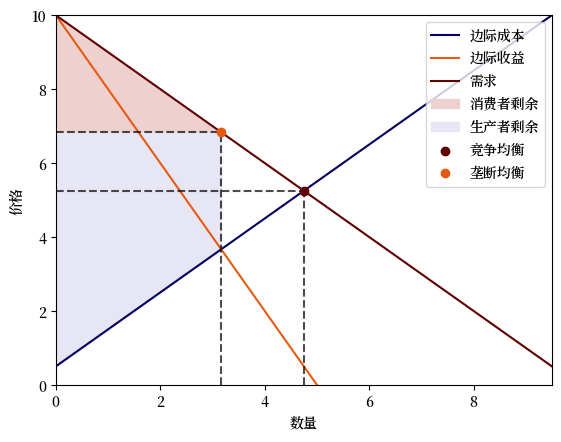

In [22]:
Π = np.array([[1]])  # 现在矩阵是一个单元素
b = np.array([10])
h = np.array([0.5])
J = np.array([[1]])
μ = 1

M = Monopoly(Π, b, h, J, μ)
c, p = M.competitive_equilibrium()
q, pm = M.equilibrium_with_monopoly()

print('竞争均衡价格:', p.item())
print('竞争均衡配置:', c.item())

print('垄断供应商均衡价格:', pm.item())
print('垄断供应商均衡配置:', q.item())

plot_monopoly(M)

## 多商品福利最大化问题

我们的福利最大化问题 -- 有时也被称为社会规划问题 -- 是选择 $c$ 来最大化

$$
    - \frac{1}{2} \mu^{-1}(\Pi c -b)^\top (\Pi c -b)
$$

减去逆供给曲线下的面积，即，

$$
    h c + \frac{1}{2} c^\top J c  
$$

所以福利标准是

$$
    - \frac{1}{2} \mu^{-1}(\Pi c -b)^\top (\Pi c -b) -h c 
        - \frac{1}{2} c^\top J c
$$

在这个公式中，$\mu$ 是一个参数，描述了规划者如何权衡外部供应商和我们代表性消费者的利益。

对 $c$ 的一阶条件是

$$
- \mu^{-1} \Pi^\top \Pi c + \mu^{-1}\Pi^\top b - h -  J c = 0
$$

这意味着 {eq}`eq:old5p` 被满足。

因此，与单一商品情形一样，对于多商品情况，一个竞争均衡的数量向量解决了一个规划问题。

（这是第一福利定理的另一个版本。）

我们可以从以下两个地方推导出竞争均衡的价格向量：

  * 逆需求曲线，或

  * 逆供给曲线